In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from copy import copy
import math 

In [2]:
datadir = '/scratch/rfischer/Kooi_data/data_output/'
datadir2 = '/scratch/dlobelle/Kooi_data/data_output/'
datadir3 = '/data/oceanparcels/output_data/data_Reint/'

In [3]:
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}

In [4]:
region = 'SO'
res = '1x1'
#mortality = 0.39              # [d-1]
runtime = 90                  # [days]
dt = 60                       # [seconds]
outputdt = 12                 # [hours]
mixing = ['markov_0_KPP_reflectNEMO_detritus_tidalmixing']#,'no'] #'fixed', 
diss = '006'
rhobf = '1388'
rhofr = '2200'
sizebinedges = [1e-3, 1e-4, 1e-5]


In [5]:
ds_0 = xr.open_dataset(datadir3+f'regional_{region}_bfnoadv_Oct_2003_1x1res_markov_0_KPP_ceiling_tides_MEDUSA_1388rhobf_458days_60dtsecs_12hrsoutdt.nc') #f'{datadir}regional_{region}_bfadv_Jan_2004_{res}res_{mixing[0]}_full_grazing_{diss}diss_{rhobf}rhobf_{rhofr}rhofr_{runtime}days_{dt}dtsecs_{outputdt}hrsoutdt.nc')
#ds_0 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing[0]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
#ds_1 = xr.open_dataset(datadir2+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing[1]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
#ds_2 = xr.open_dataset(datadir2+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing[2]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

In [6]:
dslist = [ds_0]#, ds_1] #, ds_2]

In [7]:
times = ds_0['time'][0,:].astype('O')
timelabels = ds_0['time'][0,:].dt.strftime('%Y-%m-%d')

In [8]:
mixing_cmap = ['firebrick','seagreen','purple']
w_vel_cmap = ['salmon', 'lime'] #, 'cornflowerblue']

In [9]:
number_of_trajectories_to_plot = 15
n_plt = number_of_trajectories_to_plot
f_plt = int(np.round(len(ds_0['traj'])/n_plt))
print('plotting '+str(n_plt)+' of '+str(len(ds_0['traj']))+' trajectories')
print('plotting every '+str(f_plt)+' particles')

plotting 15 of 10000 trajectories
plotting every 667 particles


/usr/local/lib64/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


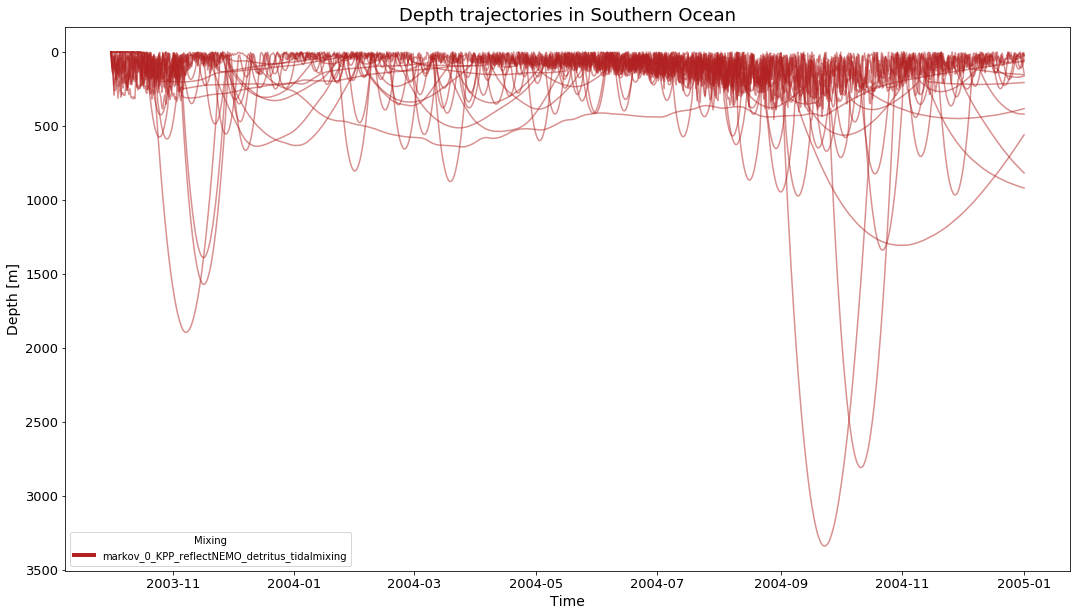

In [10]:
fig = plt.figure(figsize=(18,10))
ax = plt.axes()

for i in range(len(dslist)):
    ax.plot(dslist[i]['time'].T[:,::f_plt], dslist[i]['z'].T[:,::f_plt], c=mixing_cmap[i], alpha=0.5, label = mixing[i])
# ax.plot(ds['time'].T[:,::f_plt], ds['z'].T[:,::f_plt], c=mixing_cmap[2], alpha=0.3, label = mixing[1])

ax.set_title('Depth trajectories in '+regions[region], fontsize=18)
ax.set_ylabel('Depth [m]', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
# ax.set_ylim(100,0)
ax.tick_params(axis='both', labelsize=13)
ax.invert_yaxis()
# ax.set_xticks(times[::6].values)
# ax.set_xticklabels(timelabels[::6].values)
# ax.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=mixing_cmap[0], lw=4)]

ax.legend(custom_lines, [mixing[0]], title='Mixing', loc='lower left')
plt.show()

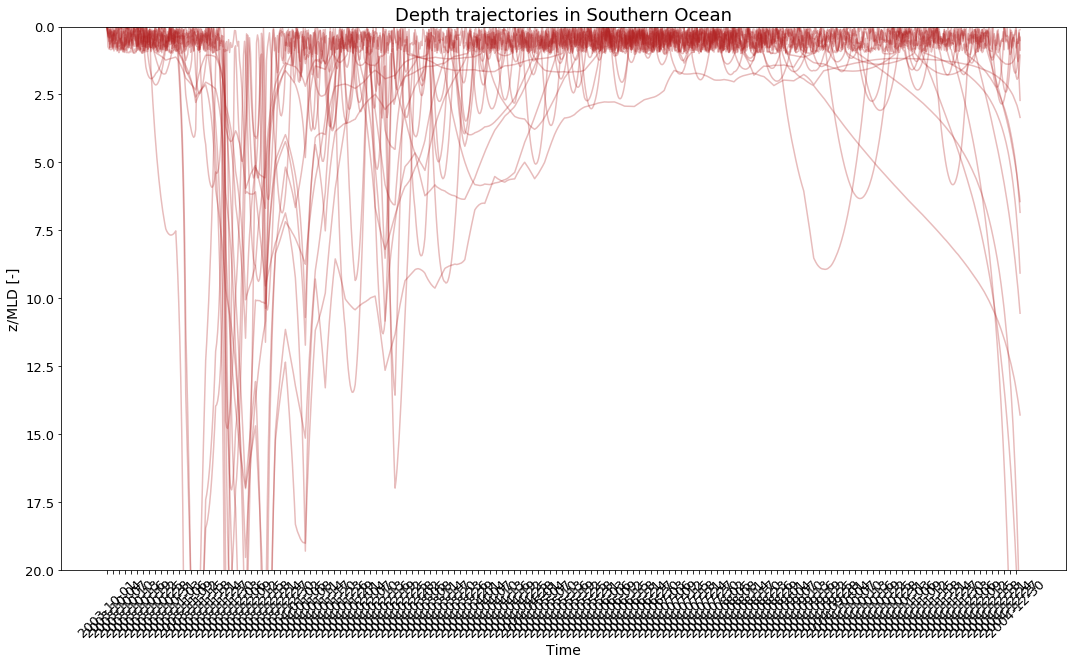

In [11]:
fig = plt.figure(figsize=(18,10))
ax = plt.axes()

for i in range(len(dslist)):
    ax.plot(dslist[i]['time'].astype('O').T[:,::f_plt], dslist[i]['mld'].T[:,::f_plt], c=mixing_cmap[i], alpha=0.3, label = mixing[0])

ax.set_title('Depth trajectories in '+regions[region], fontsize=18)
ax.set_ylabel('z/MLD [-]', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.tick_params(axis='both', labelsize=13)
ax.set_xticks(times[::6].values)
ax.set_xticklabels(timelabels[::6].values)
ax.tick_params(axis='x', rotation=45)
ax.set_ylim(20,0)


plt.show()

In [12]:
# fig = plt.figure(figsize=(12,6), constrained_layout=True)
# fig.suptitle('Depth trajectories per sizeclass in '+regions[region], fontsize=20, y=1.03)
# gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[0, 1])
# #ax3 = fig.add_subplot(gs[1, 0])
# #ax4 = fig.add_subplot(gs[1, 1])
# axes = [ax1, ax2] #, ax3, ax4]

# for r, ax in enumerate(axes):
#     for i in range(len(mixing)):
#         split_ds = list(dslist[i].groupby_bins('r_pl',sizebinedges[::-1]))
#         ax.plot(split_ds[r][1]['time'].T[:,::f_plt], split_ds[r][1]['mld'].T[:,::f_plt], c=mixing_cmap[i], alpha=0.3, label = mixing[i])

#     ax.set_title('Radius = '+"{left:.2e} - {right:.2e}".format(left=split_ds[r][0].left, right=split_ds[r][0].right))
#     ax.set_ylabel('z/MLD [-]')
#     ax.set_xlabel('Time')
#     ax.tick_params(axis='x', rotation=45)
#     ax.set_ylim(5,-1)

#     custom_lines = [Line2D([0], [0], color=mixing_cmap[0], lw=4)]

# #     ax.invert_yaxis()
#     ax.legend(custom_lines, [mixing[0]], title='Mixing', loc='lower left')
# plt.show()

In [13]:
# depthbins = np.linspace(0,200,50)
# starttimes=(dslist[0]['time'][0,:]-np.timedelta64(int(outputdt/2.), 'h')).values
# endtime = (dslist[0]['time'][0,-1]+np.timedelta64(int(outputdt/2.), 'h')).values
# timebins = np.append(starttimes,endtime)
# depth_densities = np.zeros((len(dslist),len(dslist[0]['obs']),len(depthbins)-1))

# for i in range(len(depth_densities)):
#     for j in range(len(dslist[i]['obs'])):
#         values, bins = np.histogram(dslist[i]['z'].isel(obs=j), depthbins)
#         depth_densities[i,j] = values/len(dslist[i]['traj'])

In [14]:
# split_ds = list(dslist[0].groupby_bins('r_pl',sizebinedges[::-1]))
# depth_densities = np.zeros((len(split_ds),len(dslist[0]['obs']),len(depthbins)-1))

# for i in range(len(depth_densities)):
#     for j in range(len(dslist[0]['obs'])):
#         values, bins = np.histogram(split_ds[i][1]['z'].isel(obs=j), depthbins)
#         depth_densities[i,j] = values/len(split_ds[i][1]['traj'])

In [15]:
# fig = plt.figure(figsize=(15,6),constrained_layout=True)
# gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[0, 1])
# #ax3 = fig.add_subplot(gs[1, 0])
# #ax4 = fig.add_subplot(gs[1, 1])
# axes = [ax1, ax2] #, ax3, ax4]

# for c, ax in enumerate(axes):
#     ax.set_facecolor('k')
#     pc = ax.pcolormesh(timebins,depthbins,depth_densities[c].T, cmap='magma',norm=mcolors.LogNorm(vmin=1e-3, vmax=1))
#     #ax.set_title(mixing[0]+' mixing', fontsize=14)
#     ax.set_ylabel('Depth [m]', fontsize=14)
#     ax.tick_params(axis='both', labelsize=13)
#     ax.tick_params(axis='x', rotation=45)
#     ax.set_ylim(0, 200)
#     ax.invert_yaxis()
#     #cb.set_label('Fraction of particles - logarithmic', size=15)
#     ax.set_title('Radius = '+"{left:.2e} - {right:.2e}".format(left=split_ds[c][0].left, right=split_ds[c][0].right))
        
# cb = fig.colorbar(pc) #, cax=ax3)
# cb.set_label('Fraction of particles - logarithmic', size=15)
# fig.suptitle('Particle depth distribution in '+regions[region]+' (logarithmic)', fontsize=20)

In [16]:
# fig = plt.figure(figsize=(8,5),constrained_layout=True)
# ax=plt.axes()
# #tot_days = (len(depth_densities[0,:,0])-1)/2
# sizebinlegend = ['5e-4 : 5e-3', '5e-5 : 5e-4', '5e-6 : 5e-5', '5e-7 : 5e-6']

# for c in range(len(depth_densities)):
#     #ax.set_facecolor('k')
#     ax.plot(depth_densities[c][-1][:],depthbins[:-1])
#     #ax.set_title(mixing[0]+' mixing', fontsize=14)
#     ax.set_ylabel('Depth [m]', fontsize=14)
#     ax.set_xlabel('Fraction of particles', fontsize=14)
#     ax.tick_params(axis='both', labelsize=13)
#     #ax.tick_params(axis='x', rotation=45)
#     ax.set_ylim(0, 200)
#     ax.set_xlim(0,1.0)
#     ax.invert_yaxis()
#     ax.legend(sizebinlegend) 
#     #cb.set_label('Fraction of particles - logarithmic', size=15)
#     #ax.set_title('Radius = '+"{left:.2e} - {right:.2e}".format(left=split_ds[c][0].left, right=split_ds[c][0].right))
# #ax.set_xscale('log')       
# #cb.set_label('Fraction of particles - logarithmic', size=15)
# fig.suptitle(f'Particle depth distribution in {regions[region]} after {runtime} days', fontsize=15)

In [17]:
# '''Determine % of particles found at the surface, in mixed layer and below'''

# surf = np.zeros((len(split_ds),len(dslist[0]['obs'])))
# mld = np.zeros((len(split_ds),len(dslist[0]['obs'])))
# deep = np.zeros((len(split_ds),len(dslist[0]['obs'])))

# for i in range(len(split_ds)):
#     for j in range(len(dslist[0]['obs'])):
#         mld_p = split_ds[i][1]['mld'].isel(obs=j)
#         z_p = split_ds[i][1]['z'].isel(obs=j)
#         s = np.where(z_p==0.6)[0]
#         m = np.where((mld_p<=1.0) & (z_p>0.6))[0]
#         d = np.where(mld_p>1.0)[0]
#         tot_p = len(s)+len(m)+len(d) # since some particles are deleted and become NaN so not always 2500 particles per size class
#         surf[i,j] = len(s)/tot_p #len(split_ds[i][1]['traj']))
#         mld[i,j] = len(m)/tot_p 
#         deep[i,j] = len(d)/tot_p 
#         #deep[j] = (mld_p>1.0).sum()/len(split_ds[i][1]['traj'])

In [18]:
# surf = np.zeros((len(dslist),len(split_ds),len(dslist[0]['obs'])))
# mld = np.zeros((len(dslist),len(split_ds),len(dslist[0]['obs'])))
# deep = np.zeros((len(dslist),len(split_ds),len(dslist[0]['obs'])))

# for di in range(len(dslist)):
#     split_ds = list(dslist[di].groupby_bins('r_pl',sizebinedges[::-1]))
#     for i in range(len(split_ds)):
#         for j in range(len(dslist[0]['obs'])):
#             mld_p = split_ds[i][1]['mld'].isel(obs=j)
#             z_p = split_ds[i][1]['z'].isel(obs=j)
#             s = np.where(z_p==0.6)[0]
#             m = np.where((mld_p<=1.0) & (z_p>0.6))[0]
#             d = np.where(mld_p>1.0)[0] #(mld_p>1.0).sum()/len(split_ds[i][1]['traj'])
#             tot_p = len(s)+len(m)+len(d) # since some particles are deleted and become NaN so not always 2500 particles per size class
#             surf[di,i,j] = len(s)/tot_p 
#             mld[di,i,j] = len(m)/tot_p 
#             deep[di,i,j] = len(d)/tot_p 

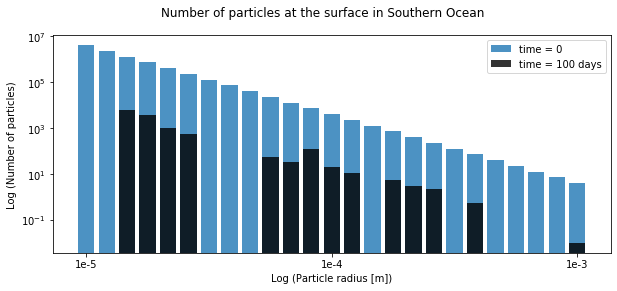

In [20]:
'''Cozar size-abundance log distribution at surface'''

num_bins = 25
at_day = 100
mult = 24/outputdt
obs_num = int(at_day*mult)
time_tot = len(dslist[0]['obs'])
fig = plt.figure(figsize=(10,4))
ax=plt.axes()

xlab = ['1e-5','1e-4','1e-3'] 
xpos = np.linspace(0,num_bins-1,len(xlab))

power = np.linspace(6,0,num_bins)

values, bins = np.histogram(dslist[0]['r_pl'],(np.insert(np.logspace(-5,-3,num_bins)+1e-7,0,0.9e-5))) ##math.floor(np.log10(split_ds[ds][1]['r_pl'].min()).round()),math.ceil(np.log10(split_ds[ds][1]['r_pl'].max()).round()),num_bins))

z_p = dslist[0]['z'].isel(obs=obs_num) 
s = np.where(z_p<=0.6) 
r_pl_all = dslist[0]['r_pl']
r_pl_s = r_pl_all[s]
values2, bins2 = np.histogram(r_pl_s,(np.insert(np.logspace(-5,-3,num_bins)+1e-7,0,0.9e-5)))#math.floor(np.log10(split_ds[ds][1]['r_pl'].min()).round()),math.ceil(np.log10(split_ds[ds][1]['r_pl'].max()).round()),num_bins))
    
values = values/10**2 * 10**power
values2 = values2/10**2 * 10**power
    
ax1 = ax.bar(np.arange(num_bins),values,alpha = 0.8) #x[0+i*(num_bins-1):(num_bins-1)+i*(num_bins-1)],values)  
ax2 = ax.bar(np.arange(num_bins),values2,alpha = 0.8,color = 'k') #x[0+i*(num_bins-1):(num_bins-1)+i*(num_bins-1)],values2,color = 'k')

ax.set_xticks(xpos)
ax.set_xticklabels(xlab)
ax.set_yscale('log')
ax.set_ylabel('Log (Number of particles)')
ax.set_xlabel('Log (Particle radius [m])')
ax.legend((ax1,ax2),('time = 0',f'time = {at_day} days'))
fig.suptitle('Number of particles at the surface in '+regions[region]) # at time = 0 and time = '+str((time_tot-1)/2)+' days', fontsize=20)
plt.show()


In [21]:
mult

2.0

In [22]:
917*2

1834

In [23]:
print(z_p)

<xarray.DataArray 'z' (traj: 10000)>
array([359.929192,   7.731947, 340.626754, ...,  11.21691 ,  35.680764,
        20.489718])
Dimensions without coordinates: traj
Attributes:
    long_name:      
    standard_name:  depth
    units:          m
    positive:       down


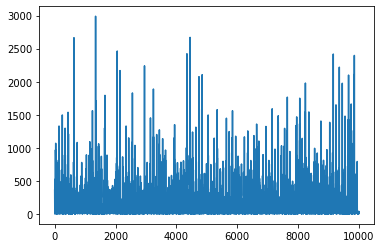

In [24]:
plt.plot(z_p)

In [25]:
print(np.where(z_p == np.nan))

(array([], dtype=int64),)


In [26]:
np.count_nonzero(np.isnan)

1

In [19]:
# day = 10
# fig = plt.figure(figsize=(15,12),constrained_layout=True)
# gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[0, 1])
# ax3 = fig.add_subplot(gs[1, 0])
# ax4 = fig.add_subplot(gs[1, 1])
# axes = [ax1, ax2, ax3, ax4]
# xlab = ['surface','mixed layer','below MLD']
# x_pos = np.arange(len(xlab))
# bar_width = 0.25


# for c, ax in enumerate(axes):
#     surf_p = surf[:,c,day*2]
#     mld_p = mld[:,c,day*2]
#     deep_p = deep[:,c,day*2]
#     kpp_mix = [surf_p[0],mld_p[0],deep_p[0]]
#     #no_mix = [surf_p[1],mld_p[1],deep_p[1]]
#     #kpp_mix = [surf_p[2],mld_p[2],deep_p[2]]


#     ax.bar(x_pos-bar_width, kpp_mix, color='b', alpha=0.5, width = bar_width) #depth_densities_mld[0][c][day*2], color='b', alpha=0.5, width = bar_width)
#     #ax.bar(x_pos, no_mix, color='g',  alpha=0.5, width = bar_width)
#     #ax.bar(x_pos+bar_width, kpp_mix, color='r', alpha=0.5, width = bar_width)
#     ax.set_xticks(x_pos)
#     ax.set_xticklabels(xlab)
#     ax.set_title(mixing[0]+' mixing', fontsize=14)
#     ax.set_ylabel('Fraction', fontsize=14)
#     #ax.tick_params(axis='both', labelsize=13)
#     #ax.tick_params(axis='x', rotation=45)
#     ax.set_ylim(0, 1)
#     ax.set_title('Radius = '+"{left:.2e} - {right:.2e}".format(left=split_ds[c][0].left, right=split_ds[c][0].right))
#     ax.legend(mixing)
    
# fig.suptitle('Particle depth distribution in '+regions[region]+' after '+str(day)+' days', fontsize=20)